<a href="https://colab.research.google.com/github/PriyanshuDutta7/Heart-Disease-Prediction/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


In [ ]:
heart=pd.read_csv('/content/heart_cleveland_upload.csv')

In [ ]:
print(heart)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [ ]:
#print last 5 rows of dataset
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [ ]:
#print 1st 5 rows of dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
df=pd.DataFrame(heart)
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [ ]:
#getting the no of rows and columns
heart.shape

(297, 14)

In [ ]:
# getting some info about the data
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
# checking for missing values
heart.isnull().sum()  # it gives us the number of missing values in each column

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#no of null values before data cleaning
NaN_count=df.isna().sum()
print(NaN_count)

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [ ]:
#data cleaning and filling
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
NaN_count=df.isna().sum()
print(NaN_count)

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


/tmp/ipython-input-351852033.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/tmp/ipython-input-351852033.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
df.ffill(inplace=True)
df.bfill(inplace=True)
NaN_count=df.isna().sum()
print(NaN_count)


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [ ]:
#statistical measures about the data
df.describe()   #50% value of age 56 means the dataset has 50% of the value less than 56 as age

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
# checking the distribution of "condition" variable
df['condition'].value_counts()  # it will tell us how many values are 0  and how many are 1 in 'condition' column


,count
condition,
0,160
1,137


1 --> Defective Heart



0 --> Healthy Heart

<Axes: xlabel='restecg', ylabel='condition'>

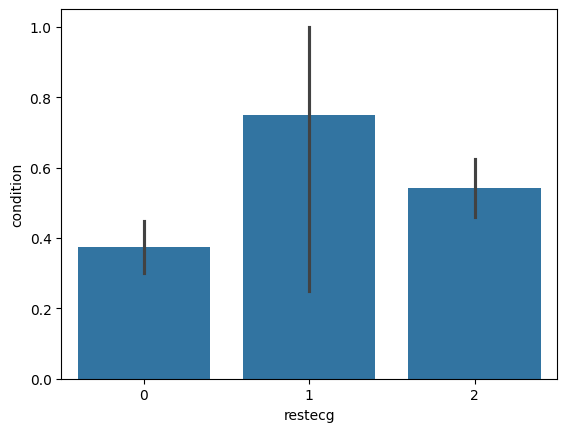

In [ ]:
sns.barplot(x='restecg',y='condition',data=df)

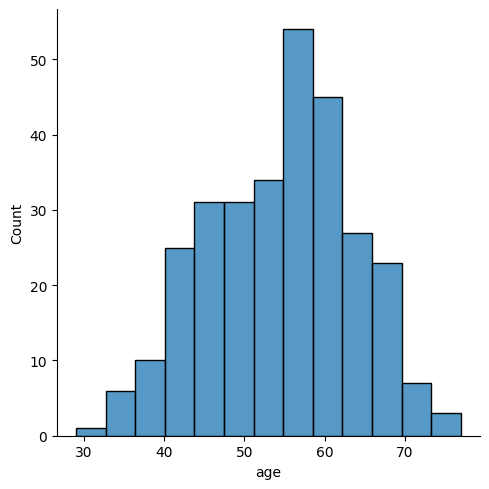

In [ ]:
sns.displot(df['age'])
plt.show()

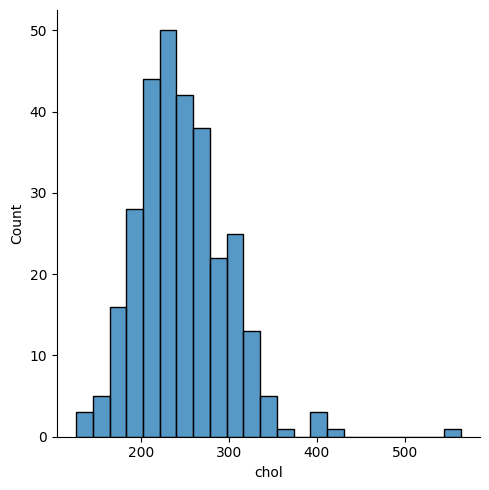

In [ ]:
sns.displot(df['chol'])
plt.show()

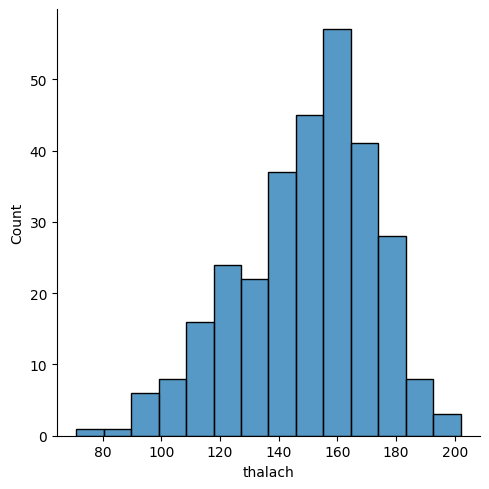

In [ ]:
sns.displot(df['thalach'])
plt.show()

Hybrid Feature Selection



Chi Square Test


Recursive Feature Elimination(RFE)

In [ ]:
#seperating features and target
X = df.drop(columns=["condition"])   # Features
Y = df["condition"]  #Target

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  
0        1   1     0  
1        0   2     0  
2        2   0    

In [ ]:
print(Y)

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64


Chi-Square Test-


Chi-square works only with non-negative values (because it uses frequencies), so we scale features to [0,1].

In [ ]:
# Scale features for chi-square
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Apply Chi-Square feature selection
chi2_selector = SelectKBest(score_func=chi2, k=10)   # pick top 8 features
X_chi2 = chi2_selector.fit_transform(X_scaled, Y)


In [ ]:
# Get selected feature names
chi2_features = X.columns[chi2_selector.get_support()]
print("Top features selected by Chi-Square:")
print(list(chi2_features))

Top features selected by Chi-Square:
['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
chi2_table = pd.DataFrame({
    "Selected_Features (Chi-Square)": list(chi2_features)
})

print("\nFeatures selected by Chi-Square test:")
print(chi2_table)


Features selected by Chi-Square test:
  Selected_Features (Chi-Square)
0                            age
1                            sex
2                             cp
3                        restecg
4                        thalach
5                          exang
6                        oldpeak
7                          slope
8                             ca
9                           thal


In [ ]:
print("\n✨ Features selected by Chi-Square test:")
display(
    chi2_table.style
        .set_table_styles(
            [{'selector': 'th', 'props': [('background-color', '#4CAF50'),
                                          ('color', 'white'),
                                          ('font-weight', 'bold'),
                                          ('text-align', 'center')]}]
        )
        .set_properties(**{'text-align': 'center', 'border': '1px solid black', 'padding': '5px'})
        .hide(axis="index")   # hides the row index
)


✨ Features selected by Chi-Square test:


Selected_Features (Chi-Square)
age
sex
cp
restecg
thalach
exang
oldpeak
slope
ca
thal


Wrapper Method (RFE)


Here we take the features selected by Chi-Square and apply RFE with Logistic Regression to refine further.

In [ ]:
# Logistic Regression as estimator
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')


In [ ]:
# Run RFE on Chi-square selected features
rfe = RFE(estimator=log_reg, n_features_to_select=5)  # keep 5 best features
X_rfe = rfe.fit_transform(X_chi2, Y)


In [ ]:
# Get final selected features
rfe_features = chi2_features[rfe.support_]
print("Final features selected by Hybrid Method (Chi2 + RFE):")
print(list(rfe_features))

Final features selected by Hybrid Method (Chi2 + RFE):
['cp', 'thalach', 'oldpeak', 'ca', 'thal']


In [ ]:
rfe_table = pd.DataFrame({
    "Selected_Features (RFE after Chi-Square)": list(rfe_features)
})

print("\nFeatures selected by RFE (final hybrid selection):")
print(rfe_table)


Features selected by RFE (final hybrid selection):
  Selected_Features (RFE after Chi-Square)
0                                       cp
1                                  thalach
2                                  oldpeak
3                                       ca
4                                     thal


In [ ]:
print("\n✨ Features selected by RFE (final hybrid selection):")
display(
    rfe_table.style
        .set_table_styles(
            [{'selector': 'th', 'props': [('background-color', '#2196F3'),
                                          ('color', 'white'),
                                          ('font-weight', 'bold'),
                                          ('text-align', 'center')]}]
        )
        .set_properties(**{'text-align': 'center', 'border': '1px solid black', 'padding': '5px'})
        .hide(axis="index")
)


✨ Features selected by RFE (final hybrid selection):


Selected_Features (RFE after Chi-Square)
cp
thalach
oldpeak
ca
thal


In [ ]:
X = df[rfe_features]     # selected features
y = df["condition"]     # target variable


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% test data
    random_state=42,     # reproducibility
    stratify=y           # maintains class balance
)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (237, 5)
X_test shape : (60, 5)
y_train shape: (237,)
y_test shape : (60,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

# Train model on scaled training data
log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully!")


Logistic Regression model trained successfully!


In [ ]:
# Predict class labels
y_pred = log_reg.predict(X_test_scaled)

# Predict probabilities (needed for ROC-AUC)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Predictions completed!")


Predictions completed!


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Evaluation Metrics:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)
print("ROC-AUC  :", roc_auc)


Model Evaluation Metrics:
Accuracy : 0.9
Precision: 1.0
Recall   : 0.7857142857142857
F1-score : 0.88
ROC-AUC  : 0.9129464285714286


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[32  0]
 [ 6 22]]


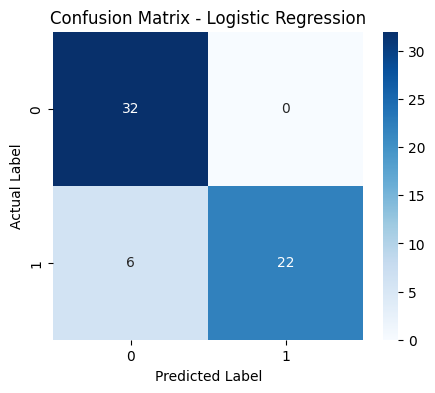

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



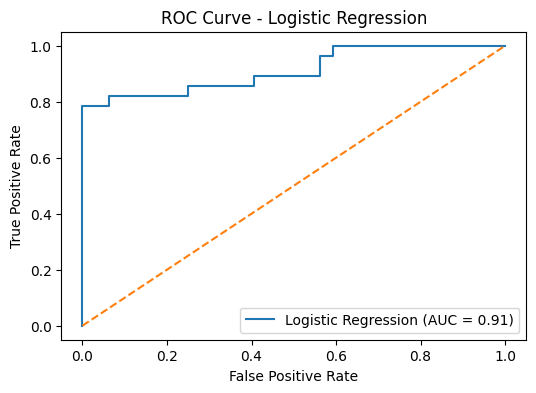

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVC


In [ ]:
svm_model = SVC(
    kernel='rbf',
    probability=True,   # REQUIRED for ROC-AUC
    random_state=42
)


In [ ]:
svm_model.fit(X_train_scaled, y_train)

print("SVM model trained successfully!")


SVM model trained successfully!


In [ ]:
# Predict class labels
y_pred_svm = svm_model.predict(X_test_scaled)

# Predict probabilities
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

print("SVM predictions completed!")

SVM predictions completed!


In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

print("SVM Model Evaluation Metrics:")
print("Accuracy :", accuracy_svm)
print("Precision:", precision_svm)
print("Recall   :", recall_svm)
print("F1-score :", f1_svm)
print("ROC-AUC  :", roc_auc_svm)

SVM Model Evaluation Metrics:
Accuracy : 0.8833333333333333
Precision: 1.0
Recall   : 0.75
F1-score : 0.8571428571428571
ROC-AUC  : 0.9508928571428572


In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(cm_svm)


Confusion Matrix (SVM):
[[32  0]
 [ 7 21]]


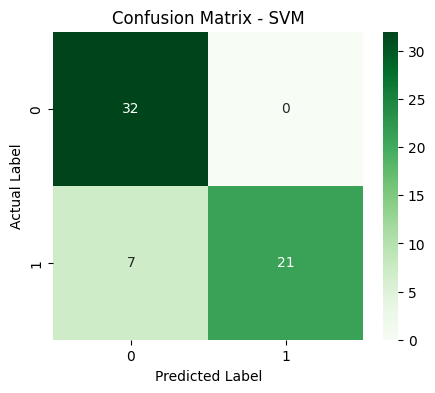

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - SVM")
plt.show()


In [ ]:
print("Classification Report - SVM:")
print(classification_report(y_test, y_pred_svm))


Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.75      0.86        28

    accuracy                           0.88        60
   macro avg       0.91      0.88      0.88        60
weighted avg       0.90      0.88      0.88        60



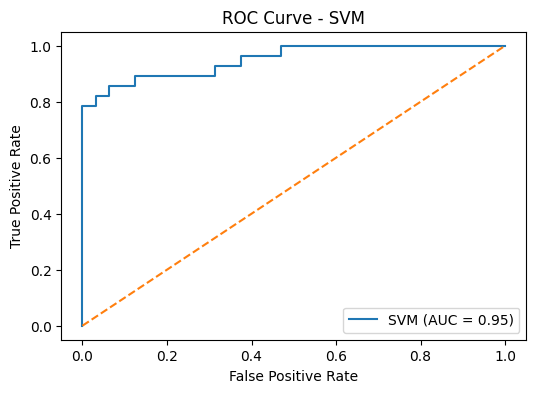

In [ ]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)

plt.figure(figsize=(6,4))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    random_state=42,
    max_depth=None
)


In [ ]:
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


In [ ]:
# Predict class labels
y_pred_rf = rf_model.predict(X_test)

# Predict probabilities (for ROC-AUC)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest predictions completed!")


Random Forest predictions completed!


In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("Random Forest Model Evaluation Metrics:")
print("Accuracy :", accuracy_rf)
print("Precision:", precision_rf)
print("Recall   :", recall_rf)
print("F1-score :", f1_rf)
print("ROC-AUC  :", roc_auc_rf)


Random Forest Model Evaluation Metrics:
Accuracy : 0.8
Precision: 0.8076923076923077
Recall   : 0.75
F1-score : 0.7777777777777778
ROC-AUC  : 0.8694196428571429


In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(cm_rf)


Confusion Matrix (Random Forest):
[[27  5]
 [ 7 21]]


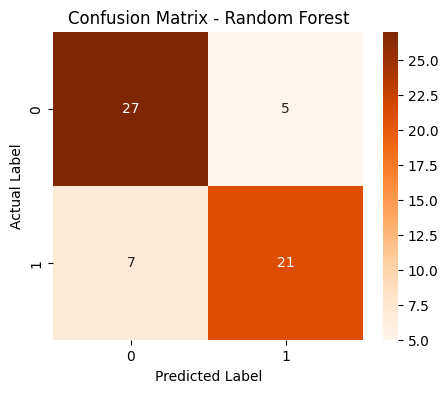

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.81      0.75      0.78        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



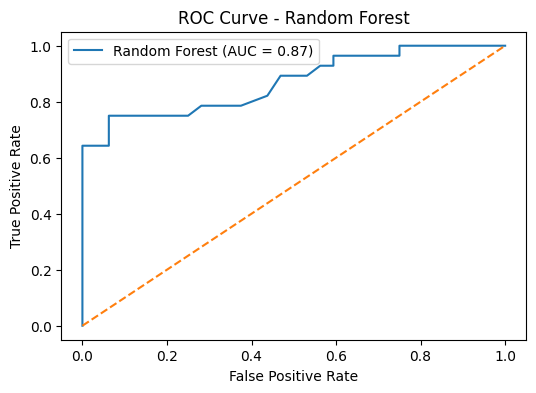

In [ ]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
ann_model = MLPClassifier(
    hidden_layer_sizes=(32, 16),  # two hidden layers
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)


In [ ]:
ann_model.fit(X_train_scaled, y_train)

print("ANN model trained successfully!")


ANN model trained successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Predict class labels
y_pred_ann = ann_model.predict(X_test_scaled)

# Predict probabilities (for ROC-AUC)
y_pred_proba_ann = ann_model.predict_proba(X_test_scaled)[:, 1]

print("ANN predictions completed!")


ANN predictions completed!


In [ ]:
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
roc_auc_ann = roc_auc_score(y_test, y_pred_proba_ann)

print("ANN Model Evaluation Metrics:")
print("Accuracy :", accuracy_ann)
print("Precision:", precision_ann)
print("Recall   :", recall_ann)
print("F1-score :", f1_ann)
print("ROC-AUC  :", roc_auc_ann)


ANN Model Evaluation Metrics:
Accuracy : 0.8
Precision: 0.9
Recall   : 0.6428571428571429
F1-score : 0.75
ROC-AUC  : 0.9073660714285714


In [ ]:
cm_ann = confusion_matrix(y_test, y_pred_ann)
print("Confusion Matrix (ANN):")
print(cm_ann)


Confusion Matrix (ANN):
[[30  2]
 [10 18]]


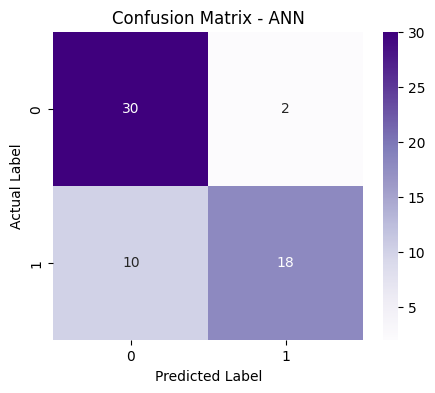

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - ANN")
plt.show()


In [ ]:
print("Classification Report - ANN:")
print(classification_report(y_test, y_pred_ann))


Classification Report - ANN:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        32
           1       0.90      0.64      0.75        28

    accuracy                           0.80        60
   macro avg       0.82      0.79      0.79        60
weighted avg       0.82      0.80      0.79        60



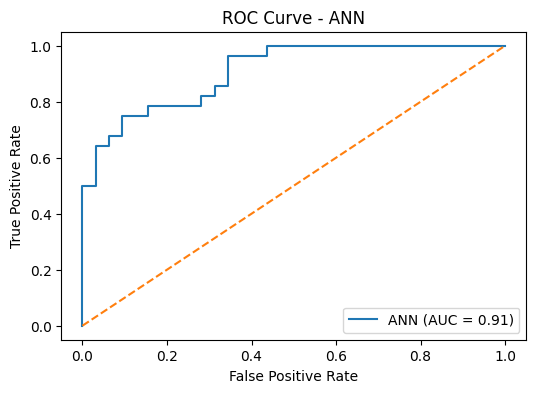

In [ ]:
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_proba_ann)

plt.figure(figsize=(6,4))
plt.plot(fpr_ann, tpr_ann, label=f"ANN (AUC = {roc_auc_ann:.2f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN")
plt.legend()
plt.show()


In [ ]:
results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "SVM",
        "Random Forest",
        "ANN"
    ],
    "Accuracy": [
        accuracy,
        accuracy_svm,
        accuracy_rf,
        accuracy_ann
    ],
    "Precision": [
        precision,
        precision_svm,
        precision_rf,
        precision_ann
    ],
    "Recall": [
        recall,
        recall_svm,
        recall_rf,
        recall_ann
    ],
    "F1-Score": [
        f1,
        f1_svm,
        f1_rf,
        f1_ann
    ],
    "ROC-AUC": [
        roc_auc,
        roc_auc_svm,
        roc_auc_rf,
        roc_auc_ann
    ]
})

results


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.900000,1.000000,0.785714,0.880000,0.912946
1,SVM,0.883333,1.000000,0.750000,0.857143,0.950893
2,Random Forest,0.800000,0.807692,0.750000,0.777778,0.869420
3,ANN,0.800000,0.900000,0.642857,0.750000,0.907366


In [ ]:
display(
    results.style
    .set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#673AB7'),
                    ('color', 'white'),
                    ('font-weight', 'bold'),
                    ('text-align', 'center')]}]
    )
    .set_properties(**{
        'text-align': 'center',
        'border': '1px solid black',
        'padding': '5px'
    })
)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.900000,1.000000,0.785714,0.880000,0.912946
1,SVM,0.883333,1.000000,0.750000,0.857143,0.950893
2,Random Forest,0.800000,0.807692,0.750000,0.777778,0.869420
3,ANN,0.800000,0.900000,0.642857,0.750000,0.907366


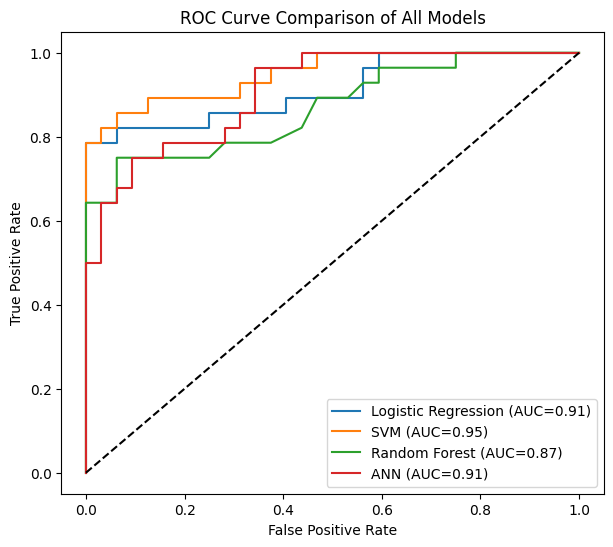

In [ ]:
plt.figure(figsize=(7,6))

plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={roc_auc:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={roc_auc_svm:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_rf:.2f})")
plt.plot(fpr_ann, tpr_ann, label=f"ANN (AUC={roc_auc_ann:.2f})")

plt.plot([0,1], [0,1], linestyle="--", color="black")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of All Models")
plt.legend()
plt.show()


In [ ]:
best_model_row = results.sort_values(
    by=["Recall", "F1-Score"],
    ascending=False
).iloc[0]

best_model_row


,0
Model,Logistic Regression
Accuracy,0.9
Precision,1.0
Recall,0.785714
F1-Score,0.88
ROC-AUC,0.912946


In [ ]:
print("✅ Final Selected Model:")
print("Model Name :", best_model_row["Model"])
print("Recall     :", best_model_row["Recall"])
print("F1-Score   :", best_model_row["F1-Score"])
print("ROC-AUC    :", best_model_row["ROC-AUC"])


✅ Final Selected Model:
Model Name : Logistic Regression
Recall     : 0.7857142857142857
F1-Score   : 0.88
ROC-AUC    : 0.9129464285714286


In [ ]:
import joblib

joblib.dump(log_reg, "heart_disease_best_model.pkl")

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved successfully!")


✅ Scaler saved successfully!


In [ ]:
def highlight_lr(row):
    if row["Model"] == "Logistic Regression":
        return [
            'background-color: #E8F5E9; color: black; font-family: "Times New Roman"; font-weight: bold'
        ] * len(row)
    else:
        return [
            'background-color: #F5F5F5; color: black; font-family: "Times New Roman"'
        ] * len(row)

display(
    results.style
    .apply(highlight_lr, axis=1)
    .set_table_styles([
        {
            'selector': 'th',
            'props': [
                ('background-color', '#004D40'),  # deep teal
                ('color', 'white'),
                ('font-family', 'Times New Roman'),
                ('font-weight', 'bold'),
                ('font-size', '14pt'),
                ('text-align', 'center'),
                ('border', '1px solid black')
            ]
        },
        {
            'selector': 'td',
            'props': [
                ('font-size', '13pt'),
                ('border', '1px solid black'),
                ('padding', '6px'),
                ('text-align', 'center')
            ]
        }
    ])
)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.900000,1.000000,0.785714,0.880000,0.912946
1,SVM,0.883333,1.000000,0.750000,0.857143,0.950893
2,Random Forest,0.800000,0.807692,0.750000,0.777778,0.869420
3,ANN,0.800000,0.900000,0.642857,0.750000,0.907366


In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred)
cm_lr


array([[32,  0],
       [ 6, 22]])

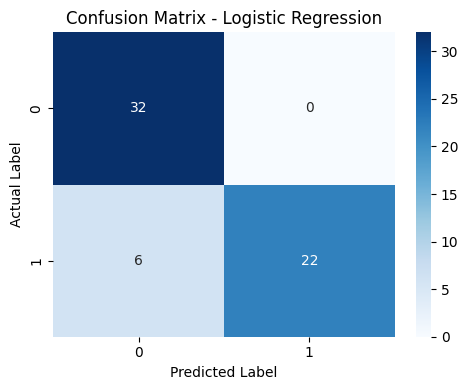

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.savefig("confusion_matrix_logistic_regression.png", dpi=300)
plt.show()


In [ ]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba)


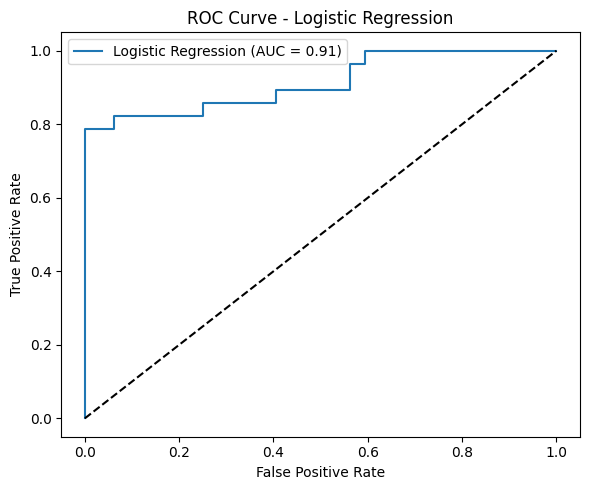

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.savefig("roc_curve_logistic_regression.png", dpi=300)
plt.show()


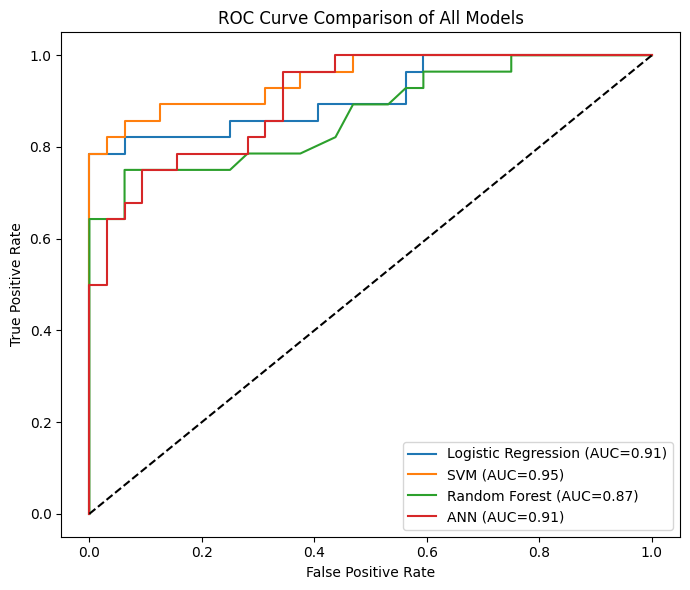

In [ ]:
plt.figure(figsize=(7,6))

plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={roc_auc:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={roc_auc_svm:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_rf:.2f})")
plt.plot(fpr_ann, tpr_ann, label=f"ANN (AUC={roc_auc_ann:.2f})")

plt.plot([0,1], [0,1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of All Models")
plt.legend()
plt.tight_layout()
plt.savefig("roc_curve_all_models.png", dpi=300)
plt.show()
